In [ ]:
Instructions

Your task is to explore the IMDB Movie Dataset, which includes columns like Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Meta_score, Director, Stars, No_of_votes, and Gross.

    Load and Inspect Data:
        Use pandas to load the IMDB Movie Dataset.
        Inspect the data to understand its structure and contents.

    Data Preprocessing:
        Handle missing values and convert data types as needed.

    Rating Trends Over Years:
        Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.

    Genre Popularity Analysis:
        Generate a Seaborn bar plot to compare the number of movies across different genres.

    Director’s Impact on Ratings:
        Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.

    Star Power Analysis:
        Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.

    Box Plot of Genres vs. Ratings:
        Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.

    Correlation Heatmap:
        Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.


In [4]:
#Daily Challenge - Set it Up

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()

# Load dataset (adjust filename/path as needed)
df = pd.read_csv("imdb_top_1000.csv")

print(df.shape)
print(df.columns)
print(df.info())
print(df.head())


Saving imdb_top_1000.csv to imdb_top_1000.csv
(1000, 16)
Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 

In [5]:
#Clean it Up

df_movies = df.copy()

df_movies["Released_Year"] = pd.to_numeric(df_movies["Released_Year"], errors="coerce")
df_movies["Runtime"] = df_movies["Runtime"].str.replace(" min", "", regex=False).astype(float)
df_movies["Gross"] = df_movies["Gross"].str.replace(",", "", regex=False).astype(float)

print(df_movies.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   float64
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(5), int64(1), object(10)
memory usage: 125.1+ KB
None


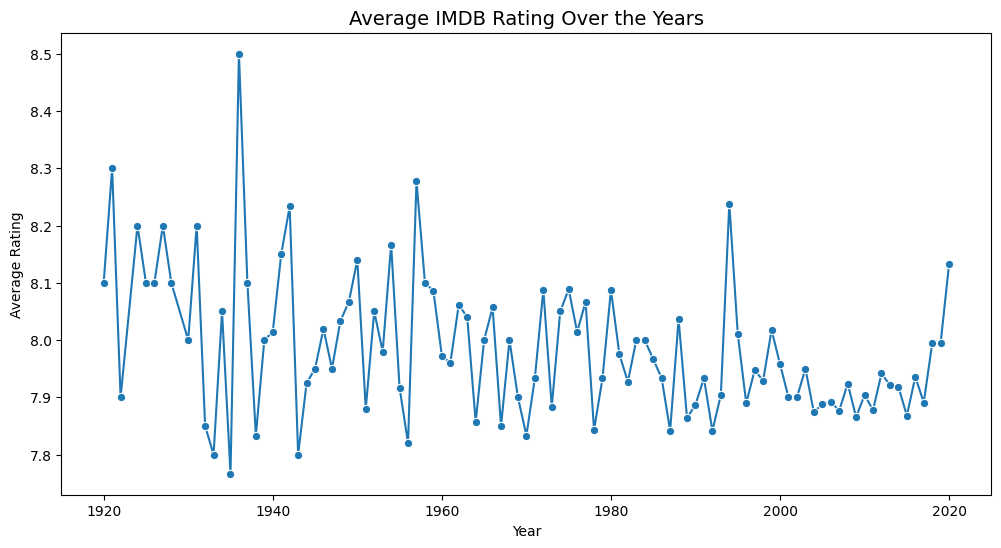

In [6]:
#Show trends in IMDB Ratings over the years
ratings_by_year = df_movies.groupby("Released_Year")["IMDB_Rating"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=ratings_by_year, x="Released_Year", y="IMDB_Rating", marker="o")
plt.title("Average IMDB Rating Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

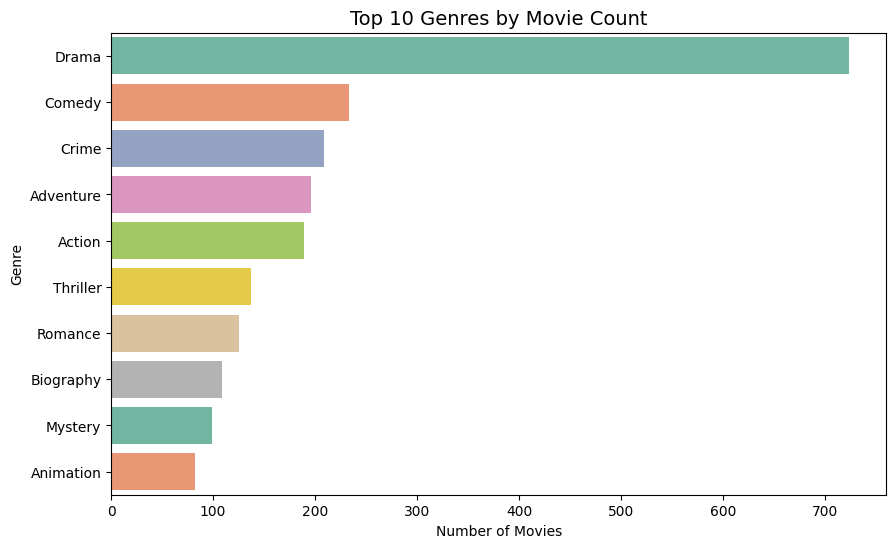

In [12]:
# Genre Popularity Analysis

df_genres = df.assign(Genre=df["Genre"].str.split(", ")).explode("Genre")

topN = 10
genre_counts = df_genres["Genre"].value_counts().head(topN).reset_index()
genre_counts.columns = ["Genre", "Count"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=genre_counts,
    x="Count", y="Genre",
    hue="Genre", legend=False, dodge=False,
    palette="Set2"
)

plt.title("Top 10 Genres by Movie Count", fontsize=14)
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

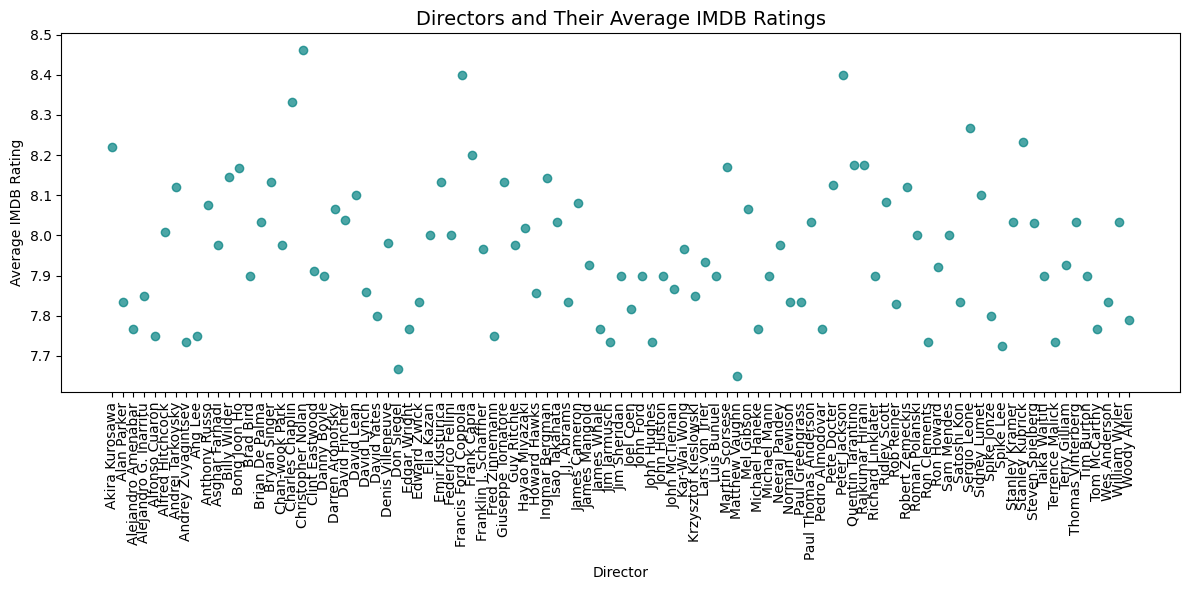

In [16]:
#Matlibplot - Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings

ratings_by_director = df_movies.groupby("Director")["IMDB_Rating"].mean().reset_index()

director_counts = df_movies["Director"].value_counts()
top_directors = director_counts[director_counts >= 3].index
ratings_by_director = ratings_by_director[ratings_by_director["Director"].isin(top_directors)]

# Scatter plot with Matplotlib
plt.figure(figsize=(12,6))
plt.scatter(ratings_by_director["Director"], ratings_by_director["IMDB_Rating"], alpha=0.7, color="teal")

plt.xticks(rotation=90)
plt.title("Directors and Their Average IMDB Ratings", fontsize=14)
plt.xlabel("Director")
plt.ylabel("Average IMDB Rating")
plt.tight_layout()
plt.show()


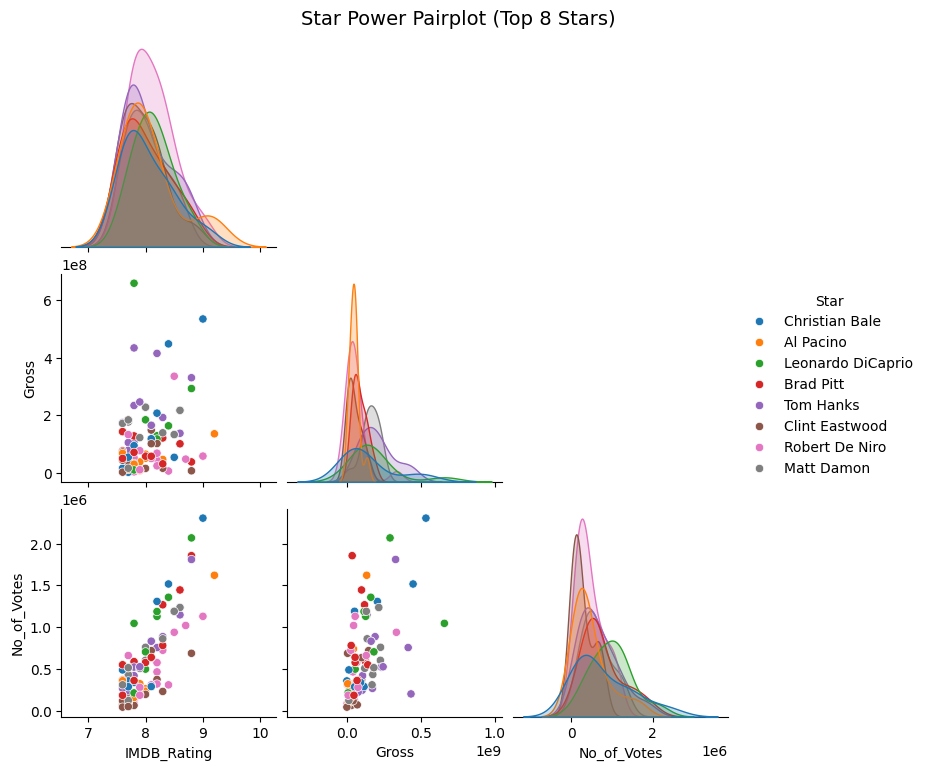

In [17]:
stars_long = (
    df_movies
      .melt(id_vars=["Series_Title","IMDB_Rating","Gross","No_of_Votes"],
            value_vars=["Star1","Star2","Star3","Star4"],
            var_name="StarSlot", value_name="Star")
      .dropna(subset=["Star"])
)

# Pick most frequent stars to keep the palette/legend sane
topN = 8
top_stars = stars_long["Star"].value_counts().head(topN).index
stars_top = stars_long[stars_long["Star"].isin(top_stars)].copy()

# Pairplot on numeric columns, hue by Star
sns.pairplot(
    stars_top[["IMDB_Rating","Gross","No_of_Votes","Star"]],
    hue="Star", diag_kind="kde", corner=True
)
plt.suptitle(f"Star Power Pairplot (Top {topN} Stars)", y=1.02, fontsize=14)
plt.show()

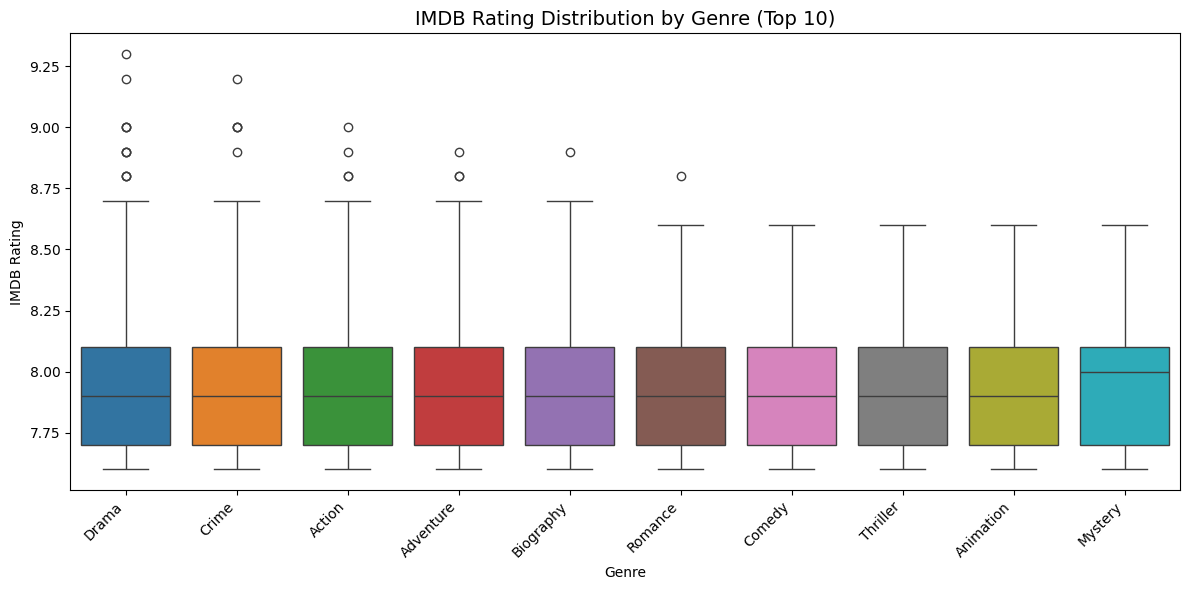

In [18]:
# Explode genres to individual rows
df_genres = df_movies.assign(Genre=df_movies["Genre"].str.split(", ")).explode("Genre")

# Focus on top genres for readability
topG = 10
top_genres = df_genres["Genre"].value_counts().head(topG).index
df_genres_top = df_genres[df_genres["Genre"].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_genres_top,
    x="Genre", y="IMDB_Rating", hue="Genre", dodge=False, legend=False
)
plt.title(f"IMDB Rating Distribution by Genre (Top {topG})", fontsize=14)
plt.xlabel("Genre")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

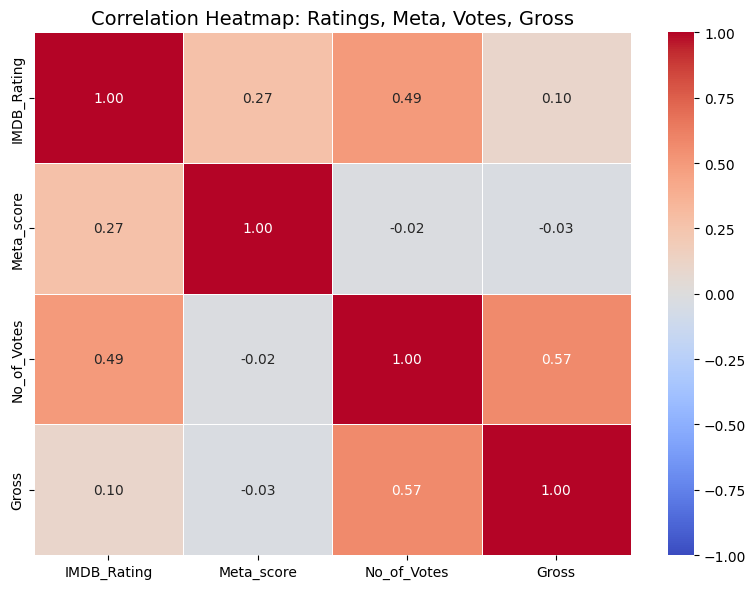

In [19]:
numeric_cols = ["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]
corr = df_movies[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap: Ratings, Meta, Votes, Gross", fontsize=14)
plt.tight_layout()
plt.show()